Q1. Write a Python code to implement the KNN classifier algorithm on load_iris dataset in
sklearn.datasets.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
from sklearn import datasets
iris = datasets.load_iris()
x=iris.data
y=iris.target

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [13]:
x_train.shape, x_test.shape

((120, 4), (30, 4))

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors = 5, algorithm= 'auto')
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [16]:
y_pred = knn.predict(x_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [17]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [18]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [19]:
print(accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)
classification_report(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



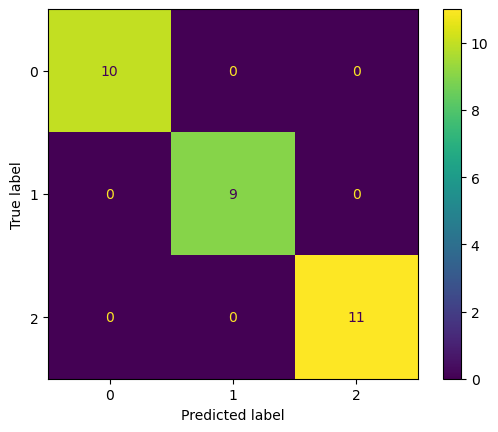

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay ,confusion_matrix
cm = confusion_matrix(y_test,y_pred,labels = knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn.classes_)
disp.plot()
plt.show()

Ques2  write a python code to implement the KNN regressor algorithm on load_boston  dataset in sklearn.datasets

In [21]:
import warnings
warnings.filterwarnings('ignore')
# importing boston dataset
from sklearn.datasets import fetch_openml
boston = fetch_openml(name = 'Boston', version = 1)
boston.data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [22]:
boston.data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88


In [23]:
boston.target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [24]:
boston.feature_names

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [25]:
# segregating into dependent(y ) and independent (x) features
x = boston.data
y = boston.target


In [26]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
dtypes: category(2), float64(11)
memory usage: 45.1 KB


In [27]:
# here in dataset , we can see that we have to convert CHAS AND RAD have to convert into int
x[['CHAS','RAD']] = x[['CHAS','RAD']].astype('float')

In [28]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [29]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,
                                                 random_state = 42)
x.shape,y.shape

((506, 13), (506,))

In [30]:
x_train.shape,y_test.shape

((404, 13), (102,))

In [31]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors = 5, algorithm = 'auto')
regressor

KNeighborsRegressor()

In [32]:
regressor.fit(x_train,y_train)

KNeighborsRegressor()

In [33]:
y_pred1 = regressor.predict(x_test)
y_pred1

array([24.54, 29.34, 14.6 , 28.  , 16.74, 31.88, 19.74, 16.06, 18.02,
       21.18, 23.38, 20.04, 12.42, 21.34, 23.7 , 22.22, 19.04, 14.06,
       35.14, 10.6 , 25.86, 29.34, 16.78, 21.08, 18.88, 22.78, 22.46,
       11.46, 23.38, 21.94, 22.68, 23.44, 10.3 , 30.04, 17.54, 21.12,
       21.66, 25.98, 22.52, 28.  , 21.18, 30.46, 38.16, 22.4 , 24.84,
       12.6 , 19.46, 28.  , 19.8 , 21.56, 22.44, 34.7 , 17.96, 21.18,
       30.36, 21.38, 12.5 , 35.14, 21.74, 21.12, 25.3 , 38.82, 29.1 ,
       14.3 , 30.46, 23.38, 12.26, 25.3 , 35.04, 13.36, 20.58, 22.52,
       17.66, 25.3 , 22.46,  8.98, 19.68, 38.16, 10.94, 14.08, 22.88,
       15.96, 24.32, 12.24, 21.46, 31.98, 14.16, 21.66, 26.04, 17.86,
       22.98, 14.7 , 17.48, 20.36, 24.76, 17.86, 30.16,  8.7 , 10.76,
       11.92, 21.8 , 22.46])

In [34]:
# model performance check
from sklearn.metrics import r2_score, mean_squared_error
r2score = r2_score(y_test,y_pred1)
mse =mean_squared_error(y_test,y_pred1)
print(mse)
print(r2score)

25.860125490196076
0.6473640882039258


Ques3. Write a python code snippet to find tthe optimal value of k
for KNN classifier algorithm using cross validation on load_iris
dataset in sklearn.datasets.

In [35]:
from sklearn import datasets
data = datasets. load_iris()
data.data
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [36]:
x = data.data  # independent feature
y = data.target  # dependent feature

from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size = 0.20,
                                                  random_state = 42)
x_train.shape, x_test.shape

((120, 4), (30, 4))

In [37]:
from sklearn.model_selection import cross_val_score


In [38]:
# create a list of odd K for KNN
neighbors = list(range(1,50,1))

In [39]:
# empty list that will hold cv scores

cv_scores = []

In [40]:
# perform 10 fold  cross validation on KNN for different values of k
for k in neighbors:
    knn= KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn,data.data,data.target,cv = 10,scoring = 'accuracy')
    cv_scores.append(scores.mean())

In [41]:
cv_scores

[0.96,
 0.9533333333333334,
 0.9666666666666666,
 0.9666666666666666,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666668,
 0.9733333333333334,
 0.9666666666666668,
 0.9666666666666668,
 0.9733333333333334,
 0.9800000000000001,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.9800000000000001,
 0.9733333333333334,
 0.9800000000000001,
 0.9666666666666666,
 0.9666666666666666,
 0.9733333333333334,
 0.96,
 0.9666666666666666,
 0.96,
 0.9666666666666666,
 0.9533333333333334,
 0.9533333333333334,
 0.9533333333333334,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9533333333333334,
 0.9533333333333334,
 0.9533333333333334,
 0.9533333333333334,
 0.9466666666666667,
 0.9400000000000001,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9400000000000001]

In [42]:
# find the optimal value of k

opti_k =  neighbors[cv_scores.index(max(cv_scores))]
print(f'The optimal number of neighbors is {opti_k}.')


The optimal number of neighbors is 13.


In [43]:
clf = KNeighborsClassifier(n_neighbors = 13)
clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [44]:
y_pred = clf.predict(x_test)

In [45]:
accuracy_score(y_test,y_pred)

1.0

In [47]:
# after using cross validation , we are getting 100% accuracy . Before this, we get 100

Q4. Implement the KNN regressor algorithm with feature scaling on load_boston dataset in
sklearn.datasets.

In [52]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(name = 'Boston',version=1)
boston.data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [53]:
boston.target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [54]:
x=boston.data  # independent feature
y= boston.target  # dependent feature

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20 , random_state = 42)
x_train.shape,x_test.shape

((404, 13), (102, 13))

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [58]:
from sklearn.neighbors import KNeighborsRegressor

In [59]:
regressor  =KNeighborsRegressor(n_neighbors = 5)
regressor.fit(x_train,y_train)

KNeighborsRegressor()

In [60]:
y_pred = regressor.predict(x_test)
y_pred

array([25.84, 33.64, 17.34, 24.08, 17.44, 22.  , 19.64, 16.18, 19.32,
       19.58, 21.94, 20.34, 10.58, 24.14, 18.36, 22.56, 20.3 , 10.18,
       37.28, 14.2 , 25.12, 26.34, 14.48, 21.18, 15.88, 13.48, 24.3 ,
       11.04, 21.42, 19.92, 24.34, 23.9 , 14.72, 21.88, 17.38, 19.08,
       31.24, 19.58, 23.8 , 24.08, 19.3 , 29.24, 37.28, 20.54, 26.04,
       13.94, 14.84, 24.08, 19.  , 25.62, 21.12, 29.24, 16.76, 22.4 ,
       41.76, 21.48, 14.74, 35.06, 22.7 , 18.44, 24.1 , 28.02, 25.54,
       19.66, 23.18, 21.48, 14.18, 23.38, 30.96, 14.68, 21.28, 22.34,
       12.48, 20.94, 24.22,  8.06, 19.68, 37.28, 11.34, 14.2 , 22.  ,
       11.04, 21.84, 11.02, 20.22, 24.6 , 14.94, 23.04, 24.6 , 18.1 ,
       24.5 ,  9.78, 18.22, 20.66, 26.96, 18.22, 20.  ,  9.2 , 11.88,
       11.8 , 21.18, 24.2 ])

In [64]:
from sklearn.metrics import r2_score,mean_squared_error

In [66]:
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

20.60552941176471
0.7190172315709293


Ques5. Write a python code snippet to implement the KNN classifier
algorithm with weighted voting on load_iris dataset in sklearn.datasets.

In [75]:
from sklearn import datasets
iris = datasets.load_iris()
x=iris.data
y=iris.target


In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)

In [79]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, weights = 'distance')

In [80]:
classifier.fit(x_train,y_train)

KNeighborsClassifier(weights='distance')

In [82]:
# Evaluate the classifier on the test data
accuracy  = classifier.score(x_test,y_test)
accuracy
print(f'accuracy : {accuracy :.2f}')


accuracy : 1.00


Ques 6. Implement a function to standardise the features before applying KNN classifier.

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors  import KNeighborsClassifier

def knn_standardization(x_train,y_train,x_test,n_neighbors=5):
    # create  a standardscaler object
    scaler  = StandardScaler()
    
    # fit the scaler on the training data
    scaler.fit(x_train)
    
    # transform the training and test data
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    
    # create a KNN classifier
    classifier = KNeighborsClassifier(n_neighbors = n_neighbors)
    
    # fit the classifier on the standardized training data
    classifier.fit(x_train,y_train)
    
    # predict the class labels of the test data
    y_pred = classifier.predict(x_test)
    
    return y_pred

In [84]:
knn_standardization(x_train,y_train,x_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

Ques7. Write a python function to calculate the euclidean distance between two points.

In [85]:
import math

def euclidean_distance(point1,point2):
    '''
    calculate the euclidean distance between two points.
    args:
        point1 (tuple): The first point, represent as a tuple of coordinates.
        point2 (tuple): The second point, represented as a tuple of coordinates.
    returns: 
         float : The euclidean distance between the two points.
         '''
    # calculate the squared differences for each dimension
    squared_diffs = [(point1[i] - point2[i])**2 for i in range(len(point1))]
    
    # calculate the sum of squared differences
    sum_squared_diffs =sum(squared_diffs)
    
    # calculate the square root of the sum of squared differences
    distance = math.sqrt(sum_squared_diffs)
    
    return distance


In [87]:
point1 = (1,2)
point2 = (4,6)

distance = euclidean_distance(point1,point2)

print(f'the euclidean distance between  {point1} and {point2} is {distance:.2f}')

the euclidean distance between  (1, 2) and (4, 6) is 5.00


Ques 8 . Write a python function to calculate the manhattan distance between two points. 

In [90]:
def manhattan_distance(point1,point2):
    '''
    calculate the manhattan distance between two points;
    
    Args:
    
    point1 (tuple) : The first point , represented as tuple of the coordinates.
    point2 (tuple) : The second point, represented as tuple of the coordinates.
    returns:
    float: the manhattan distance between them 
    
    '''
    # calculate the absolute differences for each dimension
    abs_diffs = [abs(point1[i] - point2[i])  for i in range(len(point1))]
    
    # calculate the sum of absolute differences
    distance = sum(abs_diffs)
    return distance
    

In [91]:
point1 = (1,2)
point2 = (4,7)

distance = manhattan_distance(point1,point2)

print(f'The euclidean distance between  {point1} and {point2} is {distance:.2f}') 

The euclidean distance between  (1, 2) and (4, 7) is 8.00
